

# Project: Investigate a Dataset - European Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset consists of data of the first (1st) tier of eleven (11) league competitions from season 2008/2009 to season 2005/2016, across Europe. It also comprises data of teams, players and match information of the various leagues. There are seven (7) tables in this dataset; Country, League, Team, Team Attributes, Player, Player Attributes and Match


### Question(s) for Analysis
>1. Which team and league had the most goals scored in that period (2008/2009-2015/2016)
>2. Who was the best performing player across the eleven (11) leagues in that period (2008/2009-2015/2016)? or let's say the Balon D'or winner.


In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

In [148]:
# Load data
# 1. country data
df_country = pd.read_csv('Country.csv')
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [220]:
# 2. load league data
df_league = pd.read_csv('League.csv')
df_league.head(11)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [221]:
# 3. load team data
df_team = pd.read_csv('Team.csv')
df_team.head(10)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
5,6,8635,229.0,RSC Anderlecht,AND
6,7,9991,674.0,KAA Gent,GEN
7,8,9998,1747.0,RAEC Mons,MON
8,9,7947,NaN,FCV Dender EH,DEN
9,10,9985,232.0,Standard de Liège,STL


In [151]:
# check for null values and datatypes
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [349]:
# 4. load Team Attributes
df_team_attributes = pd.read_csv('Team_Attributes.csv')

# check for datatypes and null values
df_team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [350]:
# 5. load Player data
df_player = pd.read_csv('Player.csv')

# check for datatypes and null values
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [351]:
# 6.Load Player Attributes data
df_player_attributes = pd.read_csv('Player_Attributes.csv')

# check for datatypes and null values
df_player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [353]:
# 7. Load Match data
df_match = pd.read_csv('Match.csv')
df_match.tail(2)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25978,25979,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992095,10192,9931,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [354]:
# check for number of null values
df_match.isnull().sum().sum()

407395


### Data Cleaning
> Now, it's time to do some data cleaning, so we have a concise dataset and then, we can be able to answer the questions posed.
> We realized that some tables can easily be merged because of a common attribute(s). This will hereinafter make our analysis easier. Then again, some coulmns have null values, and need to be dropped, in addition to columns not necessarily useful in our analysis.We also need to change some datatypes as well.

#### Team and League With Most Goals In Each League

>We start off by answering the first question posed. Here, we'd be needing the Team, Match and League tables. But let's start by changing the date datatype and dropping columns we'd not be needing in the match table for our analysis.

In [226]:
# change date to datetime in Match table
df_match['date'] = pd.to_datetime(df_match['date'])

In [227]:
# select necesary columns in match table
df_match = df_match.loc[:, 'id':'away_team_goal']
df_match.head(2)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0


> Let's merge the Match table with that of the Team table. But we have to do the merging twice, since the team_api_id in the Team table references both the home team and the away team in the Match table.

In [162]:
df_match = df_match.merge(df_team, left_on='home_team_api_id', right_on='team_api_id', how='inner')
df_match.columns

Index(['id_x', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'id_y', 'team_api_id',
       'team_fifa_api_id', 'team_long_name', 'team_short_name'],
      dtype='object')

> Let's drop columns not needed

In [163]:
df_match.drop(columns=['id_x','league_id','home_team_api_id','team_api_id','id_y','team_fifa_api_id','team_short_name'], inplace=True)

In [164]:
#change team_name to home_team_name
df_match.rename(columns={'team_long_name':'home_team_name'}, inplace=True)

In [165]:
df_match.columns

Index(['country_id', 'season', 'stage', 'date', 'match_api_id',
       'away_team_api_id', 'home_team_goal', 'away_team_goal',
       'home_team_name'],
      dtype='object')

>Now let's do the same cleaning for the away team, but this time with a left join

In [166]:
# merge above table with the team table
df_match = df_match.merge(df_team, left_on='away_team_api_id', right_on='team_api_id', how='left')

In [167]:
df_match.columns

Index(['country_id', 'season', 'stage', 'date', 'match_api_id',
       'away_team_api_id', 'home_team_goal', 'away_team_goal',
       'home_team_name', 'id', 'team_api_id', 'team_fifa_api_id',
       'team_long_name', 'team_short_name'],
      dtype='object')

In [168]:
#drop unnecessary columns
df_match.drop(columns=['match_api_id', 'away_team_api_id', 'id', 'team_api_id', 'team_fifa_api_id', 'team_short_name'], inplace=True)

In [169]:
# rename columns
df_match.rename(columns={'team_long_name':'away_team_name'}, inplace=True)

In [170]:
df_match.head(2)

,country_id,season,stage,date,home_team_goal,away_team_goal,home_team_name,away_team_name
0,1,2008/2009,1,2008-08-17,1,1,KRC Genk,Beerschot AC
1,1,2008/2009,12,2008-11-15,1,1,KRC Genk,KSV Roeselare


>Now let's join the above table to the league table, so we know which league a match takes place in

In [171]:
df_match_day = df_match.merge(df_league, on='country_id', how='inner')

In [172]:
df_match_day.head(2)

,country_id,season,stage,date,home_team_goal,away_team_goal,home_team_name,away_team_name,id,name
0,1,2008/2009,1,2008-08-17,1,1,KRC Genk,Beerschot AC,1,Belgium Jupiler League
1,1,2008/2009,12,2008-11-15,1,1,KRC Genk,KSV Roeselare,1,Belgium Jupiler League


>Let's drop and rename some columns

In [173]:
# drop columns not needed
df_match_day.drop(columns=['country_id', 'id'], inplace=True)

In [174]:
df_match_day.rename(columns={'name':'league_name'}, inplace=True)

In [175]:
df_match_day.head(5)

,season,stage,date,home_team_goal,away_team_goal,home_team_name,away_team_name,league_name
0,2008/2009,1,2008-08-17,1,1,KRC Genk,Beerschot AC,Belgium Jupiler League
1,2008/2009,12,2008-11-15,1,1,KRC Genk,KSV Roeselare,Belgium Jupiler League
2,2008/2009,14,2008-11-29,3,2,KRC Genk,KSV Cercle Brugge,Belgium Jupiler League
3,2008/2009,16,2008-12-13,1,0,KRC Genk,Sporting Charleroi,Belgium Jupiler League
4,2008/2009,19,2009-01-24,2,0,KRC Genk,RAEC Mons,Belgium Jupiler League


> We now have all we need to answer the first question posed. Now let's move to cleaning the data we need to answer the second question



>Oh, wait! Not so fast! We do not know the outcome of a match; whether a team won, drew or lost a match. So we really have to create a column for the winners of a match, which will help us answer the question posed.

In [181]:
# let's create a function for winners of a match 
def winner(df_match_day):
    
# an array within the table
    home_team_goal = df_match_day[0]
    away_team_goal = df_match_day[1] 
    home_team_name = df_match_day[2] 
    away_team_name = df_match_day[3] 
    
    if home_team_goal > away_team_goal:
        return home_team_name
    
    elif home_team_goal < away_team_goal:
        return away_team_name
    
    else:
        return 'draw'

In [182]:
# Add the winnner column to the table with pandas apply function 
df_match_day['winner']  = df_match_day[['home_team_goal', 'away_team_goal', 'home_team_name', 'away_team_name']].apply(winner, axis=1)

In [183]:
df_match_day.head(2)

,season,stage,date,home_team_goal,away_team_goal,home_team_name,away_team_name,league_name,winner
0,2008/2009,1,2008-08-17,1,1,KRC Genk,Beerschot AC,Belgium Jupiler League,draw
1,2008/2009,12,2008-11-15,1,1,KRC Genk,KSV Roeselare,Belgium Jupiler League,draw


>Bingo! We can know figure out whether a team won, lost or drew a match. We also have our data for analysis

#### Best Performing Player

>Here, we'll need the Player and Player Attributes tables. We'll merge the two tables together, but first, we'll do some cleaning on the Player attributes tables.

In [116]:
# change the date to datetime in player attributes
df_player_attributes['date'] = pd.to_datetime(df_player_attributes['date'])

In [117]:
# drop all the null values
df_player_attributes = df_player_attributes.dropna(how='any', axis=0)

In [118]:
# change the birthday to datetime in player table
df_player['birthday'] = pd.to_datetime(df_player['birthday'])

In [119]:
# merge player and player attributes tables
df_player_details = df_player.merge(df_player_attributes, on=['player_api_id', 'player_fifa_api_id'], how='inner')

In [120]:
df_player_details.columns

Index(['id_x', 'player_api_id', 'player_name', 'player_fifa_api_id',
       'birthday', 'height', 'weight', 'id_y', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

> Drop unwanted columns and rename some columns

In [121]:
# drop columns
df_player_details.drop(columns=['id_x', 'player_api_id', 'player_fifa_api_id','id_y'], inplace=True)

In [122]:
# rename date to match_date
df_player_details.rename(columns={'date':'match_date'}, inplace=True)

In [124]:
df_player_details.head(2)

,player_name,birthday,height,weight,match_date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,1992-02-29,182.88,187,2016-02-18,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,Aaron Appindangoye,1992-02-29,182.88,187,2015-11-19,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


> We now have all the columns needed for our analysis

<a id='eda'></a>
## Exploratory Data Analysis





### Team and League With Most Goals From 2008/2009  to 2015/2016 seasons

In [201]:
df_match_day.tail(2)

,season,stage,date,home_team_goal,away_team_goal,home_team_name,away_team_name,league_name,winner
25977,2015/2016,7,2015-08-29,0,1,Lugano,FC Luzern,Switzerland Super League,FC Luzern
25978,2015/2016,9,2015-09-22,0,0,Lugano,FC Zürich,Switzerland Super League,draw


In [218]:
df_match_day.describe()

,stage,home_team_goal,away_team_goal
count,25979.000000,25979.000000,25979.000000
mean,18.242773,1.544594,1.160938
std,10.407354,1.297158,1.142110
min,1.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000
50%,18.000000,1.000000,1.000000
75%,27.000000,2.000000,2.000000
max,38.000000,10.000000,9.000000


In [185]:
# league with most goals in that period (2008/2009-2015/2016)
most_prolific_league = df_match_day.groupby('league_name')['home_team_goal'].sum().sort_values() + df_match_day.groupby('league_name')['away_team_goal'].sum().sort_values()
most_prolific_league.sort_values(ascending= False, inplace=True)
most_prolific_league

league_name
Spain LIGA BBVA             8412
England Premier League      8240
Italy Serie A               7895
Netherlands Eredivisie      7542
France Ligue 1              7427
Germany 1. Bundesliga       7103
Portugal Liga ZON Sagres    5201
Belgium Jupiler League      4841
Scotland Premier League     4804
Poland Ekstraklasa          4656
Switzerland Super League    4166
dtype: int64

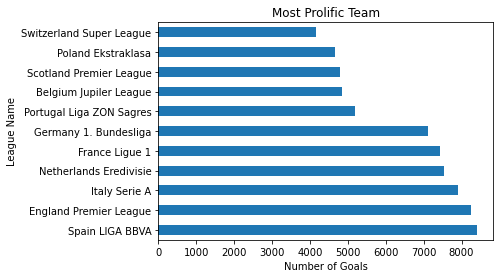

In [216]:
most_prolific_league.plot(kind='barh')
plt.title('Most Prolific Team')
plt.xlabel('Number of Goals')
plt.ylabel('League Name');

> Let's find out which team had the most wins in the whole period.

In [208]:
most_wins = df_match_day['winner'].value_counts().iloc[1:]
most_wins.head(10)

FC Barcelona         234
Real Madrid CF       228
Celtic               218
FC Bayern Munich     193
Manchester United    192
Juventus             189
SL Benfica           185
FC Porto             183
Ajax                 181
FC Basel             180
Name: winner, dtype: int64

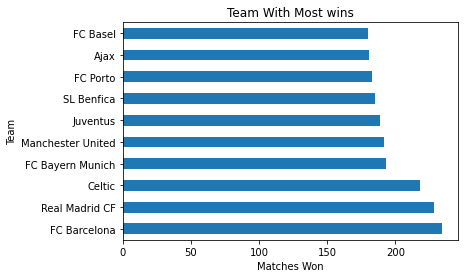

In [210]:
most_wins.head(10).plot(kind='barh')
plt.title('Team With Most wins')
plt.xlabel('Matches Won')
plt.ylabel('Team');

> Let's continue to do an analysis on the visualization of home

### Best Performing Player from 2008/2009 - 2015/2016 seasons

In [126]:
df_player_details.describe()

,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,...,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000,180228.000000
mean,181.876828,168.772277,68.632810,73.476929,55.136832,49.954275,57.271440,62.484359,49.484409,59.259666,...,57.862807,54.931148,46.773381,50.369382,48.043428,14.694065,15.946229,20.527798,16.013555,16.322353
std,6.399963,15.100542,7.027913,6.581403,17.242935,19.038771,16.476553,14.167569,18.250816,17.735261,...,15.147784,15.554301,21.225129,21.494368,21.592748,16.835751,15.836288,21.142664,16.066753,17.180074
min,157.480000,117.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,177.800000,159.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,182.880000,168.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,185.420000,179.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,208.280000,243.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


>Let's find out which player had the most overall performance during that period and create a visualization for that analysis

In [127]:
best_player = df_player_details.groupby('player_name')['overall_rating'].mean().sort_values()

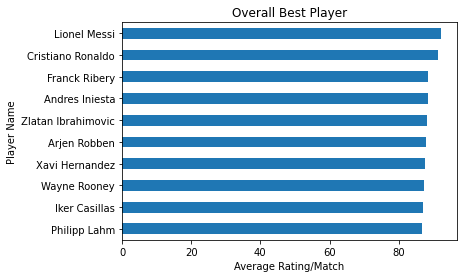

In [128]:
# get the best ten (10) players
best_player.tail(10).plot(kind='barh')
plt.title('Overall Best Player')
plt.xlabel('Average Rating/Match')
plt.ylabel('Player Name');

>We realize Lionel Messi was the player with the best performances during that period. But then again, let's look at the correlation of that variable (overall rating) to that of others.

In [129]:
# Ball Control
best_ball_control = df_player_details.groupby('player_name')['ball_control'].mean().sort_values()
best_ball_control.tail(10)

player_name
Francesco Totti       91.225000
Zlatan Ibrahimovic    91.238095
Franck Ribery         91.458333
Antonio Cassano       91.729730
Andrea Pirlo          92.022222
Andres Iniesta        92.960000
Ronaldinho            93.000000
Xavi Hernandez        93.363636
Cristiano Ronaldo     93.960000
Lionel Messi          95.769231
Name: ball_control, dtype: float64

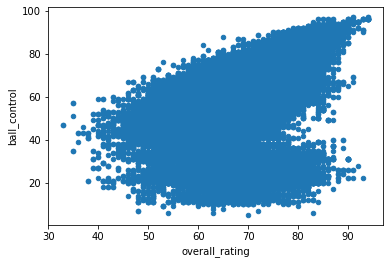

In [130]:
# overall rating against ball control
df_player_details.plot(x='overall_rating', y='ball_control', kind='scatter');

In [131]:
best_sliding_tackle = df_player_details.groupby('player_name')['sliding_tackle'].mean().sort_values()
best_sliding_tackle.tail(10)

player_name
Patrice Evra         86.558824
Gerard Pique         87.000000
Diego Godin          87.136364
Carles Puyol         87.166667
Javier Mascherano    88.080000
Giorgio Chiellini    88.111111
Ashley Cole          88.125000
Thiago Silva         88.333333
Sergio Ramos         89.000000
Philipp Lahm         94.366667
Name: sliding_tackle, dtype: float64

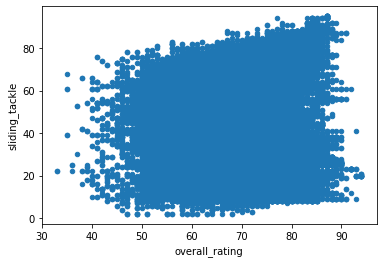

In [132]:
df_player_details.plot(x='overall_rating', y='sliding_tackle', kind='scatter');

In [133]:
# Finishing
best_finisher = df_player_details.groupby('player_name')['finishing'].mean().sort_values()
best_finisher.tail(10)

player_name
Klaas Jan Huntelaar    88.071429
Gonzalo Higuain        88.500000
Sergio Aguero          88.685714
Robin van Persie       88.710526
David Villa            88.833333
Zlatan Ibrahimovic     90.000000
Ruud van Nistelrooy    90.800000
Filippo Inzaghi        91.111111
Cristiano Ronaldo      91.120000
Lionel Messi           92.230769
Name: finishing, dtype: float64

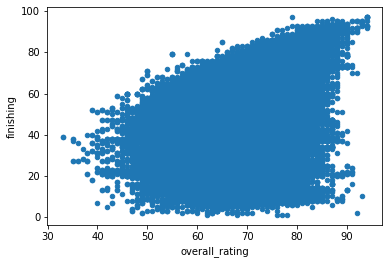

In [134]:
# overall rating against finishing
df_player_details.plot(x='overall_rating', y='finishing', kind='scatter');

>We see that the scatter plots depict a positive correlation between overall rating, and ball control, finishing and sliding tackle

<a id='conclusions'></a>
## Conclusions

> I found out that every league had different number of matches played in a season, due to the the number of teams competing in the league

>It was also found out that there were more home goals scored than that of away goals scored.

> The team with the most goals scored across that period also came from the league with the most goals scored.

> It was also found out that the two topmost players had qualities correlating to attacking in the opposition teams; that is, they can termed as 'Forwards'.

> The topmost players had dependent variables like finishing and ball control.

> The two players also came from the top two teams with most goals scored.




#### Limitations
> The match table had a lot of data missing (407395), and also did not have adequate data on match details and statistics; like possession sharing between the two teams, number of shots on and off targets, tackles won, total number of passes by a team, et al.These would have helped in an in-depth analysis of what dependencies go into winning a match. This hereinafter, prevented a two-dimensional analysis in that regard.

> There wasn't any clear distinction of the position of a player. This would have helped in picking out the best players in each position, according to data cumulated from the player and match tables.

In [355]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295